In [5]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image, display
import pydotplus
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv("../creditcard.csv")
df = df.sample(frac=1)
# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:5000]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
fraud_data = normal_distributed_df.sample(frac=1, random_state=42)


data = fraud_data.loc[:, fraud_data.columns != 'Class'] 
target = fraud_data.loc[:, fraud_data.columns == 'Class'] 
#print list(fraud_data)


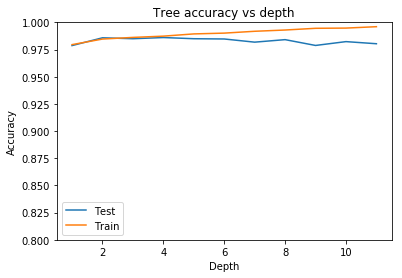

In [6]:

NUM_TIMS_TO_RUN=10
MAX_DEPTH=12
sum_test_accuracy_list=np.array([0,0])
sum_train_accuracy_list=np.array([0,0])

for j in range(NUM_TIMS_TO_RUN):
    test_accuracy_list=[]
    train_accuracy_list = []
    for i in range(1,MAX_DEPTH):
        clf = tree.DecisionTreeClassifier(max_depth=i)
        train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.15)
        #Fit train Data and test against test data
        clf.fit(train_data, train_target)
        test_accuracy_list.append([i,clf.score(test_data,test_target)])
        
        #Ftest against training data
        train_accuracy_list.append([i,clf.score(train_data,train_target)])
    
    sum_test_accuracy_list = sum_test_accuracy_list + np.array(test_accuracy_list)
    sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)

avg_test_prediction= sum_test_accuracy_list/NUM_TIMS_TO_RUN
avg_train_prediction =sum_train_accuracy_list/NUM_TIMS_TO_RUN
#print avg_test_prediction, avg_train_prediction
#print avg_train_prediction,avg_test_prediction
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.ylim((.8,1))
plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
plt.title('Tree accuracy vs depth')
plt.legend()
plt.show()

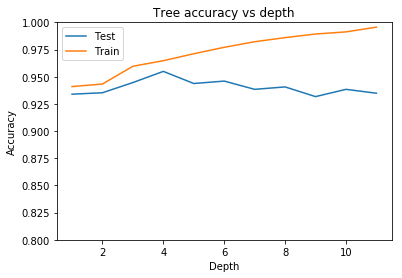

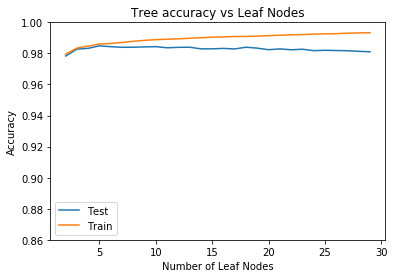

In [7]:
NUM_TIMS_TO_RUN=100
MAX_LEAF_NODE=30
sum_test_accuracy_list=np.array([0,0])
sum_train_accuracy_list=np.array([0,0])
for j in range(NUM_TIMS_TO_RUN):
    test_accuracy_list=[]
    train_accuracy_list = []
    for i in range(2,MAX_LEAF_NODE):
        clf = tree.DecisionTreeClassifier(max_leaf_nodes=i)
        train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.15)
        #Fit train Data and test against test data
        clf.fit(train_data, train_target)
        test_accuracy_list.append([i,clf.score(test_data,test_target)])
        
        #Ftest against training data
        train_accuracy_list.append([i,clf.score(train_data,train_target)])
    
    sum_test_accuracy_list = sum_test_accuracy_list + np.array(test_accuracy_list)
    sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)

avg_test_prediction= sum_test_accuracy_list/NUM_TIMS_TO_RUN
avg_train_prediction =sum_train_accuracy_list/NUM_TIMS_TO_RUN

plt.xlabel('Number of Leaf Nodes')
plt.ylabel('Accuracy')
plt.ylim((.86,1))
plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
plt.title('Tree accuracy vs Leaf Nodes')
plt.legend()
plt.show()

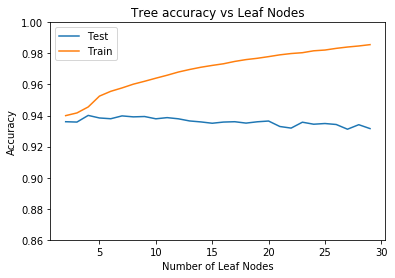

In [46]:
NUM_TIMS_TO_RUN=100
MAX_LEAF_NODE=30
sum_test_accuracy_list=np.array([0,0])
sum_train_accuracy_list=np.array([0,0])
for j in range(NUM_TIMS_TO_RUN):
    test_accuracy_list=[]
    train_accuracy_list = []
    for i in range(2,MAX_LEAF_NODE):
        clf = tree.DecisionTreeClassifier(max_leaf_nodes=i)
        train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.15)
        #Fit train Data and test against test data
        clf.fit(train_data, train_target)
        test_accuracy_list.append([i,clf.score(test_data,test_target)])
        
        #Ftest against training data
        train_accuracy_list.append([i,clf.score(train_data,train_target)])
    
    sum_test_accuracy_list = sum_test_accuracy_list + np.array(test_accuracy_list)
    sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)

avg_test_prediction= sum_test_accuracy_list/NUM_TIMS_TO_RUN
avg_train_prediction =sum_train_accuracy_list/NUM_TIMS_TO_RUN

plt.xlabel('Number of Leaf Nodes')
plt.ylabel('Accuracy')
plt.ylim((.86,1))
plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
plt.title('Tree accuracy vs Leaf Nodes')
plt.legend()
plt.show()

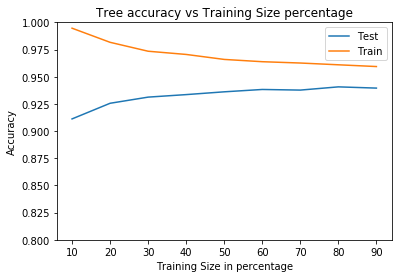

In [47]:
NUM_TIMS_TO_RUN=100
TRAIN_SIZE=10
sum_test_accuracy_list=np.array([0,0])
sum_train_accuracy_list=np.array([0,0])
for j in range(NUM_TIMS_TO_RUN):
    test_accuracy_list=[]
    train_accuracy_list = []
    for i in range(1,TRAIN_SIZE):
        clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=6, max_leaf_nodes=8)
        #clf = tree.DecisionTreeClassifier()
        train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=1-i/10.0)
        clf.fit(train_data, train_target)
        #Fit train Data and test against test data
        clf.fit(train_data, train_target)
        test_accuracy_list.append([i*10,clf.score(test_data,test_target)])
        
        #Ftest against training data
        train_accuracy_list.append([i*10,clf.score(train_data,train_target)])
    sum_test_accuracy_list = sum_test_accuracy_list + np.array(test_accuracy_list)
    sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)

avg_test_prediction= sum_test_accuracy_list/NUM_TIMS_TO_RUN
avg_train_prediction =sum_train_accuracy_list/NUM_TIMS_TO_RUN
#print avg_train_prediction, avg_test_prediction
plt.xlabel('Training Size in percentage')
plt.ylabel('Accuracy')
plt.ylim((0.8,1))
plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
plt.title('Tree accuracy vs Training Size percentage')
plt.legend()
plt.show()

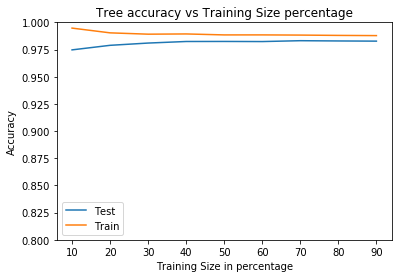

In [8]:
NUM_TIMS_TO_RUN=10
TRAIN_SIZE=10
sum_test_accuracy_list=np.array([0,0])
sum_train_accuracy_list=np.array([0,0])
for j in range(NUM_TIMS_TO_RUN):
    test_accuracy_list=[]
    train_accuracy_list = []
    for i in range(1,TRAIN_SIZE):
        clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=6, max_leaf_nodes=8)
        #clf = tree.DecisionTreeClassifier()
        train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=1-i/10.0)
        clf.fit(train_data, train_target)
        #Fit train Data and test against test data
        clf.fit(train_data, train_target)
        test_accuracy_list.append([i*10,clf.score(test_data,test_target)])
        
        #Ftest against training data
        train_accuracy_list.append([i*10,clf.score(train_data,train_target)])
    sum_test_accuracy_list = sum_test_accuracy_list + np.array(test_accuracy_list)
    sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)

avg_test_prediction= sum_test_accuracy_list/NUM_TIMS_TO_RUN
avg_train_prediction =sum_train_accuracy_list/NUM_TIMS_TO_RUN
#print avg_train_prediction, avg_test_prediction
plt.xlabel('Training Size in percentage')
plt.ylabel('Accuracy')
plt.ylim((0.8,1))
plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
plt.title('Tree accuracy vs Training Size percentage')
plt.legend()
plt.show()

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.25)

skf = StratifiedKFold(n_splits = 5, shuffle=True, random_state=42)
param_grid = {'max_depth': np.arange(1, 15),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': np.arange(3, 20)
             }



#create a grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs=-1, cv=skf)

#training
%time grid_tree.fit(train_data, train_target)

#let's see the best estimator
best_tree = grid_tree.best_estimator_
print(best_tree)
print("_"*40)
#with its score
print("Cross-validated best score {}%".format(round(grid_tree.best_score_ * 100,3)))
#score on test
predictions = best_tree.predict(test_data)
print("Test score: {}%".format(round(accuracy_score(y_true = test_target, y_pred = predictions) * 100,3)))



Wall time: 20.1 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=14,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
________________________________________
Cross-validated best score 94.549%
Test score: 92.761%


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.25)

skf = StratifiedKFold(n_splits = 5, shuffle=True, random_state=42)
param_grid = {'max_depth': np.arange(1, 15),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': np.arange(3, 20)
             }



#create a grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs=-1, cv=skf)

#training
%time grid_tree.fit(train_data, train_target)

#let's see the best estimator
best_tree = grid_tree.best_estimator_
print(best_tree)
print("_"*40)
#with its score
print("Cross-validated best score {}%".format(round(grid_tree.best_score_ * 100,3)))
#score on test
predictions = best_tree.predict(test_data)
print("Test score: {}%".format(round(accuracy_score(y_true = test_target, y_pred = predictions) * 100,3)))

Wall time: 59.5 s
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=11,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
________________________________________
Cross-validated best score 98.568%
Test score: 98.398%
